# Pytorch beginner course: Datasets and Dataloaders

## Summary

- [What are datasets?](#what-are-datasets)
    - [Datasets and Dataloaders](#datasest-and-dataloaders)
- [Fashion-MNIST dataset](#fashion-mnist-dataset)
- [Creating a custom dataset](#creating-a-custom-dataset)

## What are datasets?

In machine learning, a dataset is the collection of data a model learns from and is evaluated on. It’s typically arranged in rows (examples) and columns (features), with a label column in supervised tasks. Datasets are usually split into training, validation, and test sets. Their value depends on quality, quantity, and representativeness. In short, a dataset is to machine learning what ingredients are to a recipe: without it, nothing can be made.

Data can be stored in various formats, such as *CSV files, XML files, JSON files, Databases, raw data, etc.*, we have the necessity to transform these data in order make them compatible with Pytorch that uses `tensors`. Usually, the data are refined and preprocessed before being used in machin learning tasks, such as removing duplicates, handling missing values, normalizing data, etc. In order to do these stuffs, we can use the `pandas` library (but we will not cover it in this course).

We can avoid to use `pandas` and directly use the data in the form of tensors using **Dataloaders** defined in the `torch.utils.data` module. Dataloaders are used to load data from a dataset and provide it in batches, which is useful for training models. They can also shuffle the data, apply transformations, and handle multi-threading for efficient data loading.

### Datasest and Dataloaders

`Pytorch` provides two different data primitive: `torch.utils.data.Dataset` and `torch.utils.data.Dataloader`. Basically `Dataset` allow you to load data and its labels on the memory, while `Dataloader` wraps the dataset as an iterable object in order to provide an easy access to the data and their labels.

## Fashion-MNIST dataset

Pytorch provides a lot of datasets, in this example we will use the `Fashion-MNIST` dataset contained into `torchvision.datasets` module. The `Fashion-MNIST` dataset is a collection of `60,000` training images and `10,000` test images of clothing items, such as shirts, trousers, shoes, etc. Each image is a grayscale `28x28` pixel image, and each item is labeled with a class index from 0 to 9, representing different clothing categories. The dataset is often used as a drop-in replacement for the original MNIST dataset of handwritten digits, providing a more challenging task for image classification.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Loading Dataset
training_set = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_set = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:12<00:00, 2.08MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 381kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.15MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 915kB/s]


After dataset download, we can iterate and visualize the images and their labels using `matplotlib` library. The following code shows how to do it.

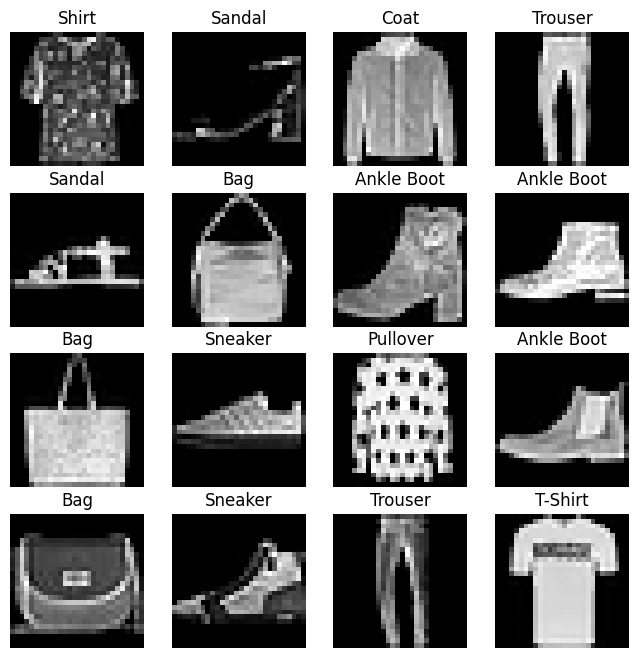

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_set), size=(1,)).item()
    img, label = training_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a custom dataset

